# Explainable AI values with Shapley values:

In [7]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Explainability on regression:

In [3]:
# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))


Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


Carefull before interpreting here: features are not normalized.

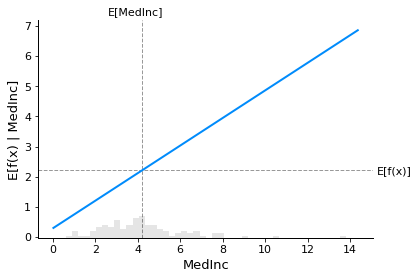

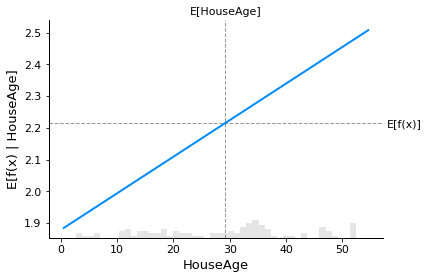

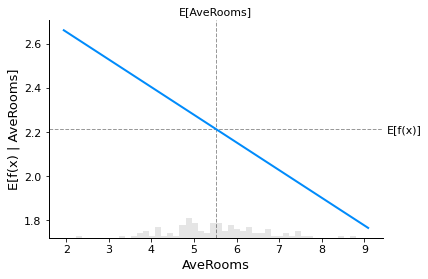

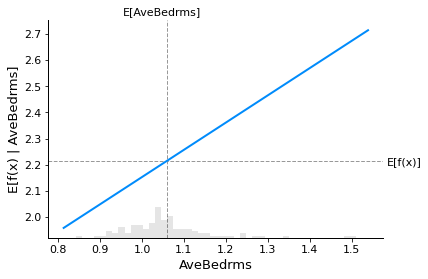

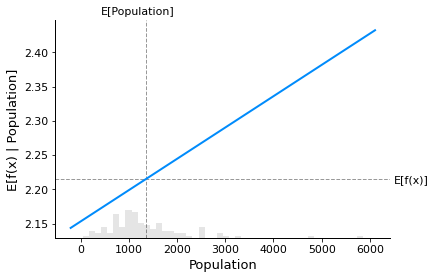

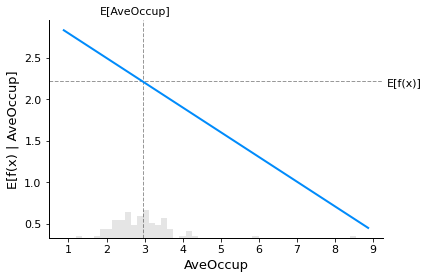

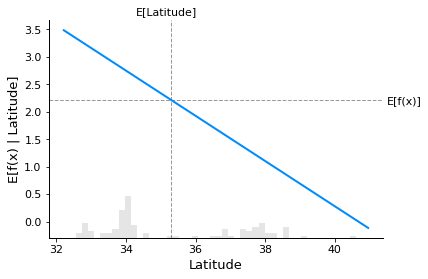

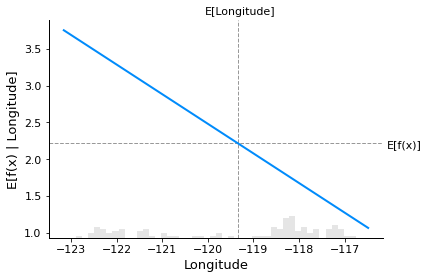

In [28]:
plt.close('all')

for i in range(X.shape[1]):
    shap.partial_dependence_plot(
        X.columns[i], model.predict, X100, ice=False,
        model_expected_value=True, feature_expected_value=True
    )
plt.show()

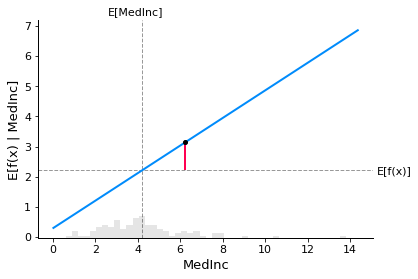

In [29]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

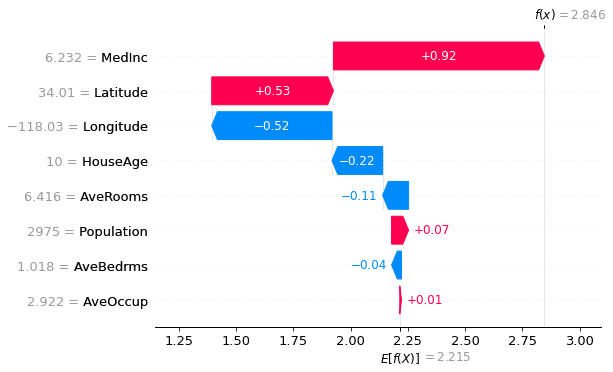

In [30]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

